# Chapter 6: Multiple Linear Regression

## Import Required Packages

In [6]:
!pip install dmba

In [7]:
# import necessary packages

import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import StandardScaler

from dmba import regressionSummary

## Multiple Linear Regression

In [8]:
# load data, 'ToyotaCorolla.csv'
# define car_df

car_df = pd.read_csv('ToyotaCorolla.csv')

In [9]:
# preview

car_df.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,0,0,0,1,0,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,0,1,0,0,0,1,0,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,1,0,0,0,1,0,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,1,0,0,0,1,0,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,0,1,0,1,0,0,0,0


In [10]:
# shape

car_df.shape

(1436, 39)

In [11]:
# columns

car_df.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'CC', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Parking_Assistant', 'Tow_Bar'],
      dtype='object')

In [15]:
# choose the first 1000 records

df = car_df.iloc[:1000,:][['Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Met_Color', 'Automatic',
'CC', 'Doors', 'Quarterly_Tax', 'Weight']]
# focus on predictors: ['Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Met_Color', 'Automatic',
# 'CC', 'Doors', 'Quarterly_Tax', 'Weight']
# use df to store it



In [16]:
# check the frequency of Fuel_Type

df.Fuel_Type.value_counts()

Fuel_Type
Petrol    867
Diesel    119
CNG        14
Name: count, dtype: int64

In [19]:
# get dummy variables for x

x = pd.get_dummies(df, drop_first=True, dtype='int')
# preview x

x.head()

,Age_08_04,KM,HP,Met_Color,Automatic,CC,Doors,Quarterly_Tax,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
0,23,46986,90,1,0,2000,3,210,1165,1,0
1,23,72937,90,1,0,2000,3,210,1165,1,0
2,24,41711,90,1,0,2000,3,210,1165,1,0
3,26,48000,90,0,0,2000,3,210,1165,1,0
4,30,38500,90,0,0,2000,3,210,1170,1,0


In [22]:
# define y, 'Price'

y = car_df.iloc[:1000,:].Price
y.head()

0    13500
1    13750
2    13950
3    14950
4    13750
Name: Price, dtype: int64

In [24]:
# partition data, 40% for validation
# random_state=1

train_x, valid_x, train_y, valid_y = train_test_split(x, y, test_size=0.4, random_state=1)
# fit the model on training data
# define car_lm, LinearRegression()

car_lm = LinearRegression()

car_lm.fit(train_x, train_y)
# define predicted_y, training data, predict()

predicted_y = car_lm.predict(train_x)

In [25]:
# performance measures, regressionSummary()
# training data
regressionSummary(train_y, predicted_y)


Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 1400.5823
            Mean Absolute Error (MAE) : 1046.9072
          Mean Percentage Error (MPE) : -1.0223
Mean Absolute Percentage Error (MAPE) : 9.2994


## Prediction for the Validation Data

array([[<Axes: title={'center': 'Price'}>]], dtype=object)

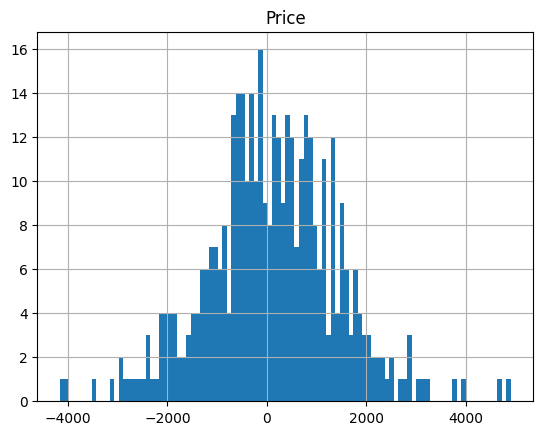

In [28]:
# Use predict() to make predictions on validation data
# redefine predicted_y

predicted_y = car_lm.predict(valid_x)
# a new dataframe residual, with the column about the difference between valid_y and predicted_y

residual = pd.DataFrame(valid_y - predicted_y)

# import additional packages
import matplotlib.pyplot as plt
%matplotlib inline

# show the histogram
# optional: bins=100

residual.hist(bins=100)

In [29]:
# evaluate the performance, validation data

regressionSummary(valid_y, predicted_y)


Regression statistics

                      Mean Error (ME) : 103.6803
       Root Mean Squared Error (RMSE) : 1312.8523
            Mean Absolute Error (MAE) : 1017.5972
          Mean Percentage Error (MPE) : -0.2633
Mean Absolute Percentage Error (MAPE) : 9.0111


**---- Back to PPT ----**

## Regularization / Shrinkage

In [31]:
# reload car_df and preview it

car_df = pd.read_csv('ToyotaCorolla.csv')
car_df.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,0,0,0,1,0,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,0,1,0,0,0,1,0,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,1,0,0,0,1,0,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,1,0,0,0,1,0,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,0,1,0,1,0,0,0,0


In [34]:
# define x by ignoring the first 3 columns, iloc[], and pd.get_dummies()
# preview it

x = pd.get_dummies(car_df.iloc[:,3:],drop_first=True, dtype="int")
x.head()

,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,CC,Doors,Cylinders,...,Fuel_Type_Petrol,Color_Black,Color_Blue,Color_Green,Color_Grey,Color_Red,Color_Silver,Color_Violet,Color_White,Color_Yellow
0,23,10,2002,46986,90,1,0,2000,3,4,...,0,0,1,0,0,0,0,0,0,0
1,23,10,2002,72937,90,1,0,2000,3,4,...,0,0,0,0,0,0,1,0,0,0
2,24,9,2002,41711,90,1,0,2000,3,4,...,0,0,1,0,0,0,0,0,0,0
3,26,7,2002,48000,90,0,0,2000,3,4,...,0,1,0,0,0,0,0,0,0,0
4,30,3,2002,38500,90,0,0,2000,3,4,...,0,1,0,0,0,0,0,0,0,0


In [35]:
# define y and partition the data
# 40% validation, random_state

y = car_df.Price

train_x, valid_x, train_y, valid_y = train_test_split(x, y, test_size=0.4, random_state=1)

In [40]:
# ridge regression
# define scaler, use StandardScaler for preprocessing predictors

scaler = StandardScaler()
# define train_x_scaled and valid_x_scaled, based on train_x and valid_x
# first fit_transform() for train_x_scaled
# then transform() for valid_x_scaled, because scaler has already been fitted before
train_x_scaled = pd.DataFrame(scaler.fit_transform(train_x), index=train_x.index, columns=train_x.columns)


valid_x_scaled = pd.DataFrame(scaler.transform(valid_x), index=valid_x.index, columns=valid_x.columns)


# define ridge, fit the Ridge model; alpha=0 means no penalty, same as OLR; set alpha=1
# fit with train_x_scaled and train_y 


ridge = Ridge(alpha=1)

ridge.fit(train_x_scaled, train_y)

# define predicted_y, using valid_x_scaled


predicted_y = ridge.predict(valid_x_scaled)
# predictive performance, for validation

regressionSummary(valid_y, predicted_y)


Regression statistics

                      Mean Error (ME) : 161.9127
       Root Mean Squared Error (RMSE) : 2647.5628
            Mean Absolute Error (MAE) : 937.5962
          Mean Percentage Error (MPE) : 0.3803
Mean Absolute Percentage Error (MAPE) : 9.1001


In [42]:
# Lasso regression
# use preprocessed predictors
# set alpha=1
# define lasso and fit with scaled training data

lasso = Lasso(alpha=1)
lasso.fit(train_x_scaled, train_y)

# define predicted_y for scaled validation data

predicted_y = lasso.predict(valid_x_scaled)
# predictive performance for validation data

regressionSummary(valid_y, predicted_y)


Regression statistics

                      Mean Error (ME) : 162.0879
       Root Mean Squared Error (RMSE) : 2660.3759
            Mean Absolute Error (MAE) : 937.7554
          Mean Percentage Error (MPE) : 0.3765
Mean Absolute Percentage Error (MAPE) : 9.0992


In [47]:
# Linear regression
# define linear and fit with training data

linear = LinearRegression()

linear.fit(train_x_scaled, train_y)
# define predicted_y for validation data

predicted_y = linear.predict(valid_x_scaled)
# predictive performance

regressionSummary(valid_y, predicted_y)


Regression statistics

                      Mean Error (ME) : 165.6172
       Root Mean Squared Error (RMSE) : 2733.3662
            Mean Absolute Error (MAE) : 942.2423
          Mean Percentage Error (MPE) : 0.4032
Mean Absolute Percentage Error (MAPE) : 9.1260
